In [3]:
library(ggplot2)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)

In [4]:
setwd('Uber Data Analysis Dataset')

In [19]:
colors <- c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0")

In [7]:
apr_data <- read.csv("uber-raw-data-apr14.csv")
may_data <- read.csv("uber-raw-data-may14.csv")
jun_data <- read.csv("uber-raw-data-jun14.csv")
jul_data <- read.csv("uber-raw-data-jul14.csv")
aug_data <- read.csv("uber-raw-data-aug14.csv")
sep_data <- read.csv("uber-raw-data-sep14.csv")
data_2014 <- rbind(apr_data,may_data, jun_data, jul_data, aug_data, sep_data)
data_2014$Date.Time <- as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S")
data_2014$Time <- format(as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")
data_2014$Date.Time <- ymd_hms(data_2014$Date.Time)
data_2014$day <- factor(day(data_2014$Date.Time))
data_2014$month <- factor(month(data_2014$Date.Time, label = TRUE))
data_2014$year <- factor(year(data_2014$Date.Time))
data_2014$dayofweek <- factor(wday(data_2014$Date.Time, label = TRUE))

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”

In [8]:
data_2014$hour <- factor(hour(hms(data_2014$Time)))
data_2014$minute <- factor(minute(hms(data_2014$Time)))
data_2014$second <- factor(second(hms(data_2014$Time)))

Warning message in .parse_hms(..., order = "HMS", quiet = quiet):
“Some strings failed to parse, or all strings are NAs”Warning message in .parse_hms(..., order = "HMS", quiet = quiet):
“Some strings failed to parse, or all strings are NAs”Warning message in .parse_hms(..., order = "HMS", quiet = quiet):
“Some strings failed to parse, or all strings are NAs”

In [9]:
hour_data <- data_2014 %>%
           group_by(hour) %>%
               dplyr::summarize(Total = n()) 
datatable(hour_data)

Warning message:
“Factor `hour` contains implicit NA, consider using `forcats::fct_explicit_na`”

ERROR: Error in datatable(hour_data): could not find function "datatable"


Warning message:
“Factor `month` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `hour` contains implicit NA, consider using `forcats::fct_explicit_na`”

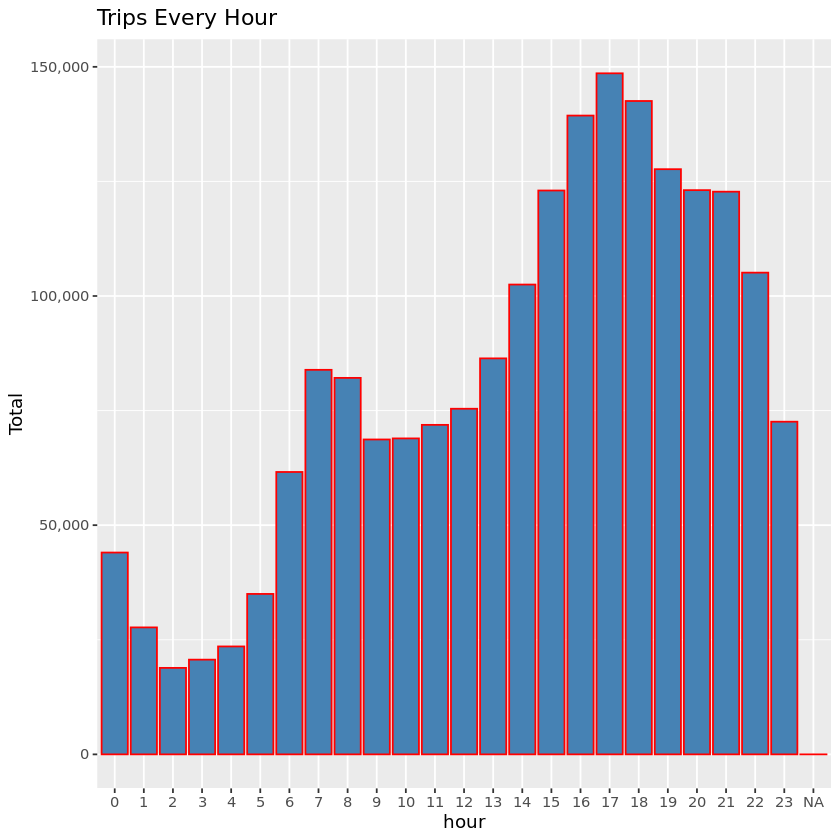

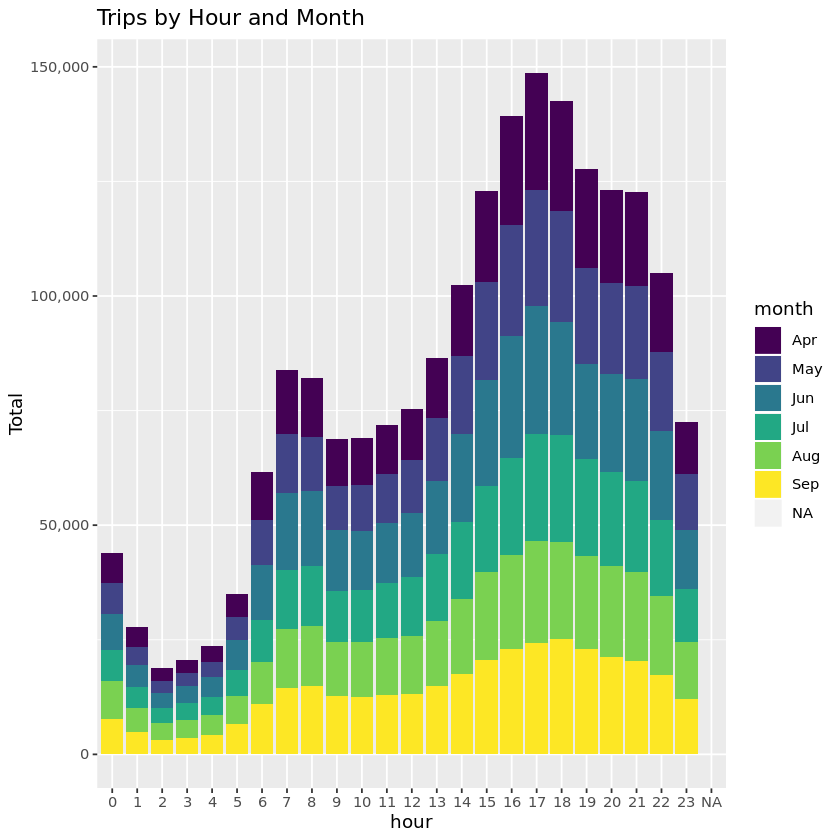

In [10]:
ggplot(hour_data, aes(hour, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue", color = "red") +
           ggtitle("Trips Every Hour") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)
month_hour <- data_2014 %>%
          group_by(month, hour) %>%
             dplyr::summarize(Total = n())
ggplot(month_hour, aes(hour, Total, fill = month)) + 
       geom_bar( stat = "identity") +
          ggtitle("Trips by Hour and Month") +
           scale_y_continuous(labels = comma)

In [11]:
day_group <- data_2014 %>%
          group_by(day) %>%
             dplyr::summarize(Total = n()) 
datatable(day_group)

Warning message:
“Factor `day` contains implicit NA, consider using `forcats::fct_explicit_na`”

ERROR: Error in datatable(day_group): could not find function "datatable"


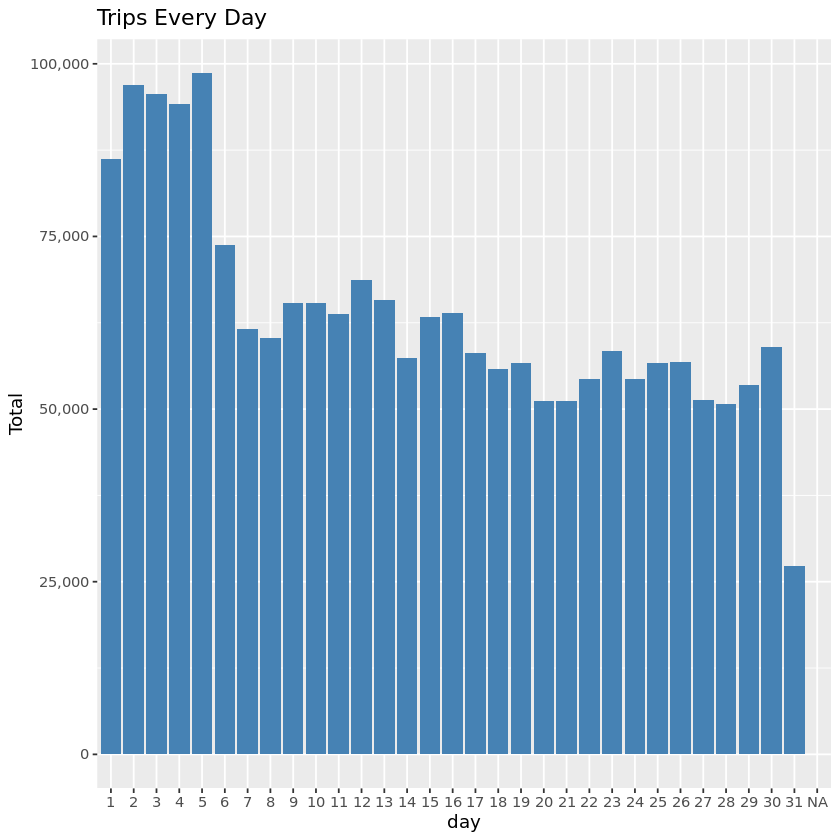

In [12]:
ggplot(day_group, aes(day, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue") +
           ggtitle("Trips Every Day") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

Warning message:
“Factor `month` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `day` contains implicit NA, consider using `forcats::fct_explicit_na`”

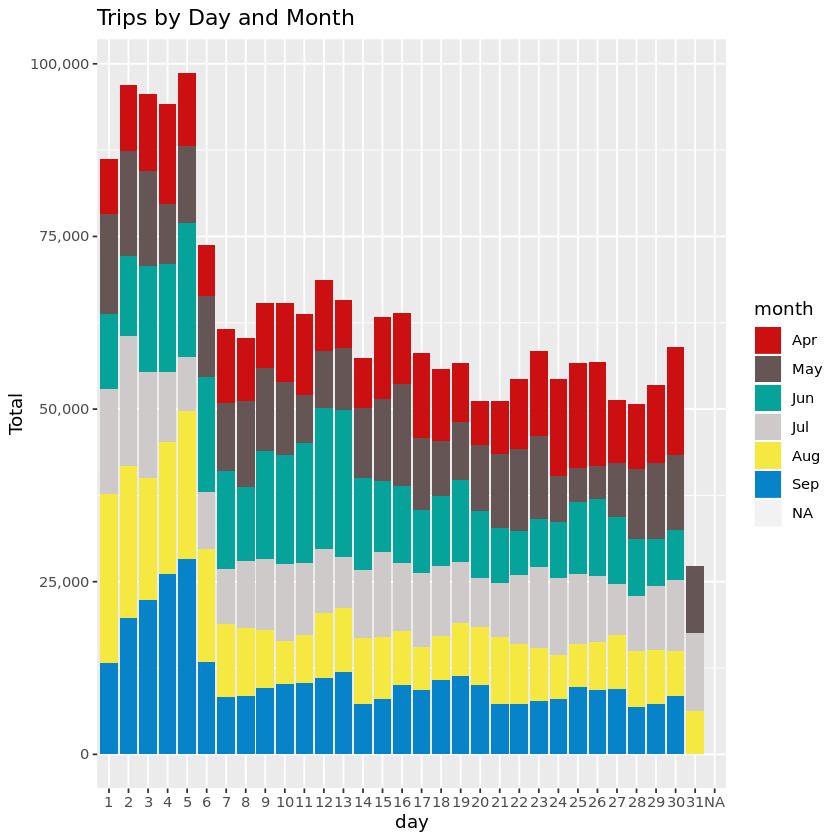

In [20]:
day_month_group <- data_2014 %>%
         group_by(month, day) %>%
             dplyr::summarize(Total = n())
ggplot(day_month_group, aes(day, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Day and Month") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors)

In [22]:
month_group <- data_2014 %>%
          group_by(month) %>%
             dplyr::summarize(Total = n()) 
datatable(month_group)

Warning message:
“Factor `month` contains implicit NA, consider using `forcats::fct_explicit_na`”

ERROR: Error in datatable(month_group): could not find function "datatable"


Don't know how to automatically pick scale for object of type function. Defaulting to continuous.
ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'Total' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)


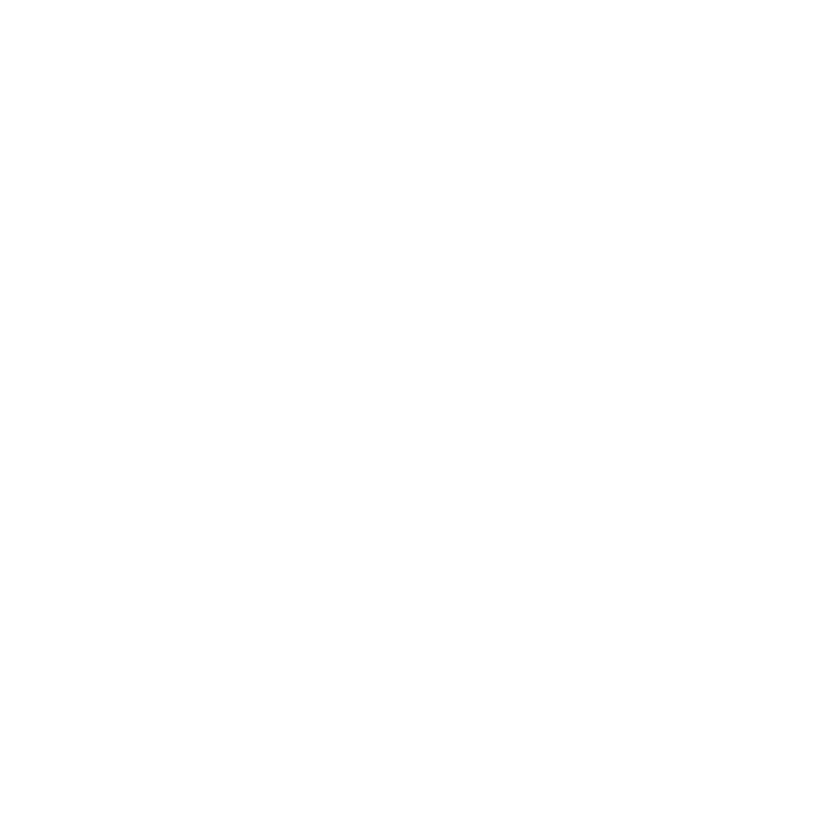

In [23]:
ggplot( , aes(month, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Month") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors)

Warning message:
“Factor `month` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `dayofweek` contains implicit NA, consider using `forcats::fct_explicit_na`”

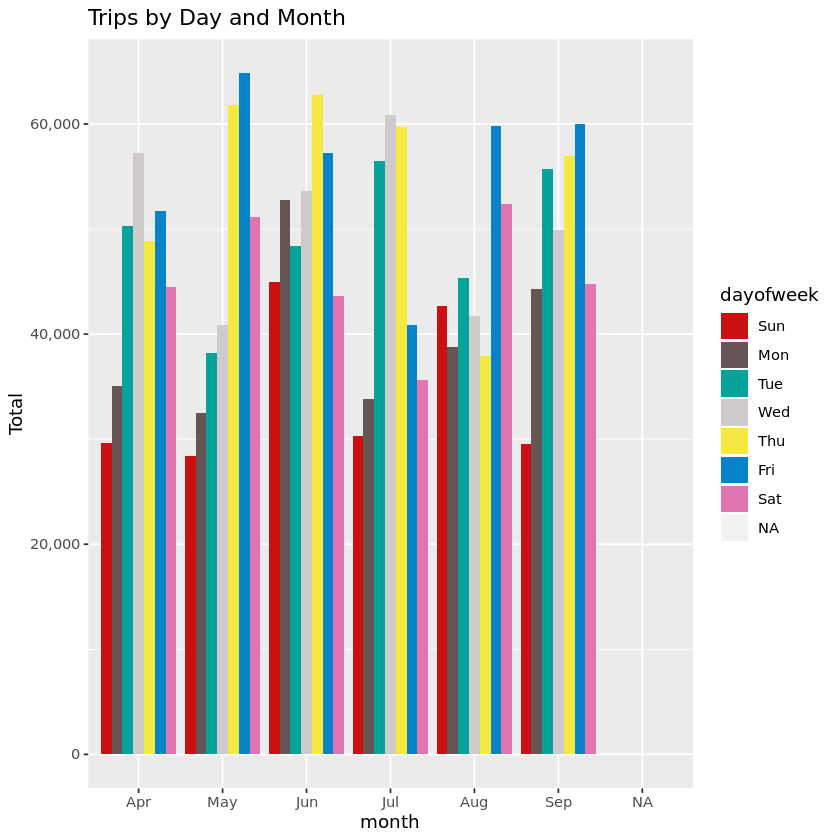

In [24]:
month_weekday <- data_2014 %>%
         group_by(month, dayofweek) %>%
             dplyr::summarize(Total = n())
ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
       geom_bar( stat = "identity", position = "dodge") +
          ggtitle("Trips by Day and Month") +
           scale_y_continuous(labels = comma) +
           scale_fill_manual(values = colors)

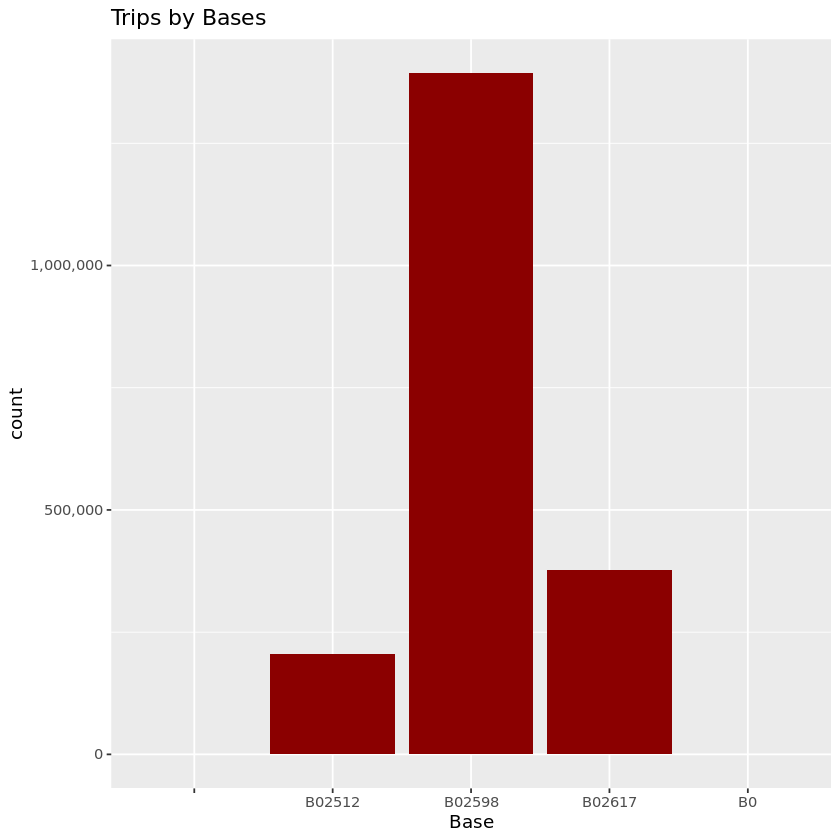

In [25]:
ggplot(data_2014, aes(Base)) + 
 geom_bar(fill = "darkred") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases")

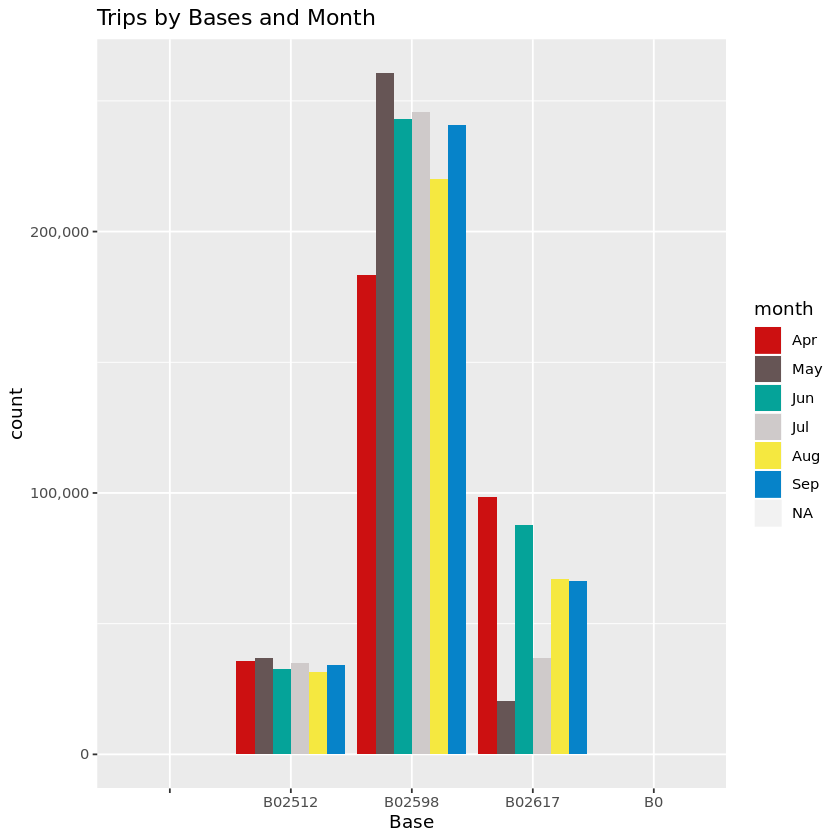

In [26]:
ggplot(data_2014, aes(Base, fill = month)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and Month") +
 scale_fill_manual(values = colors)

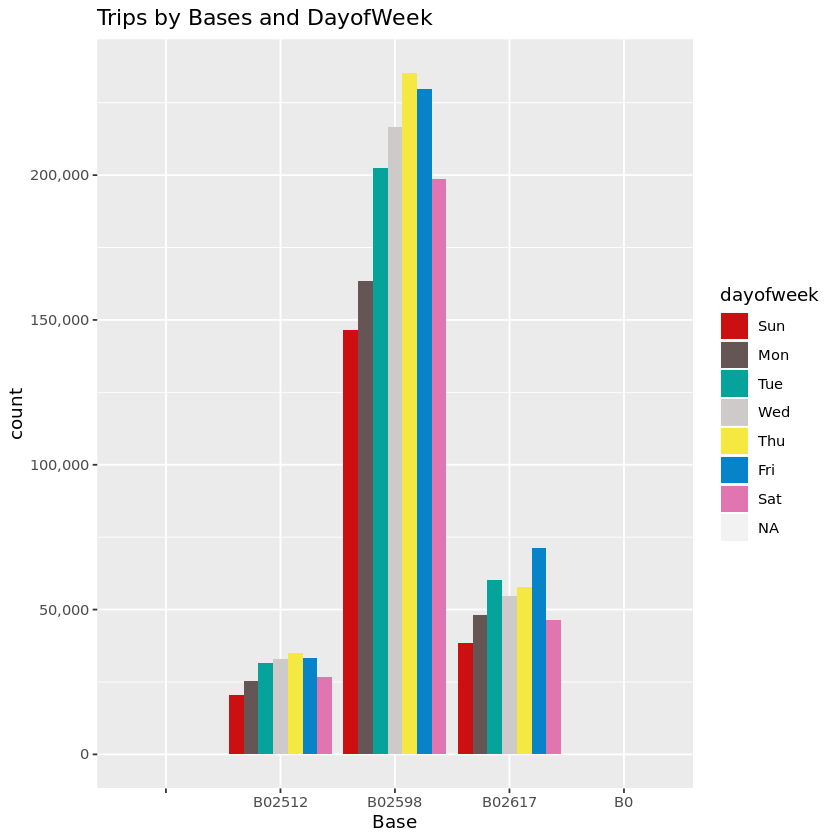

In [27]:
ggplot(data_2014, aes(Base, fill = dayofweek)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and DayofWeek") +
 scale_fill_manual(values = colors)

Warning message:
“Factor `day` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `hour` contains implicit NA, consider using `forcats::fct_explicit_na`”

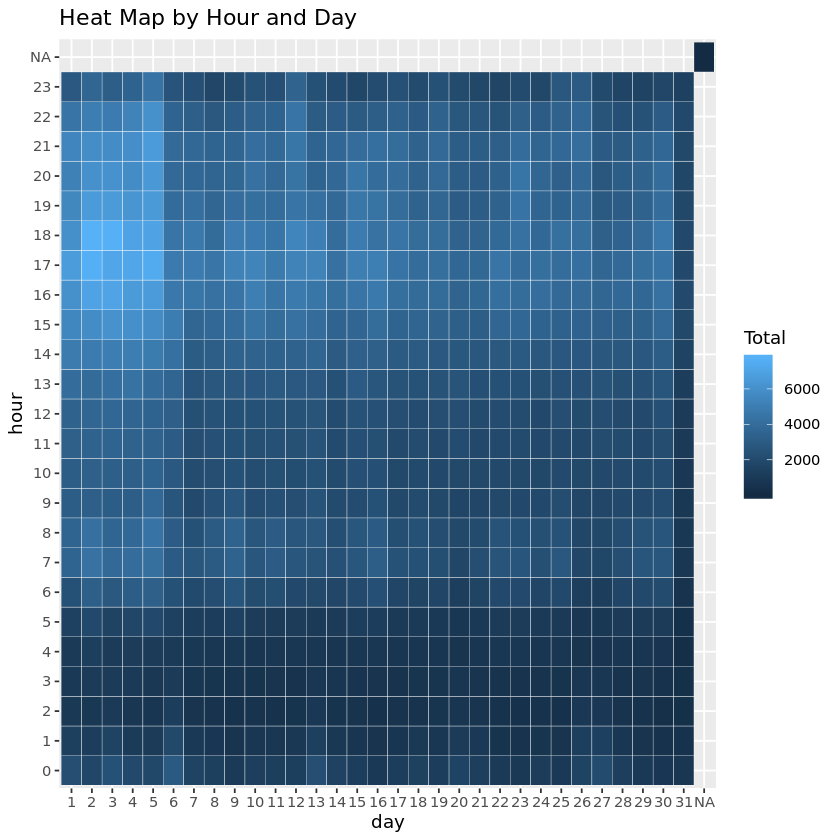

In [29]:
day_and_hour <- data_2014 %>%
         group_by(day, hour) %>%
            dplyr::summarize(Total = n())
datatable(day_and_hour)
ggplot(day_and_hour, aes(day, hour, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Hour and Day")

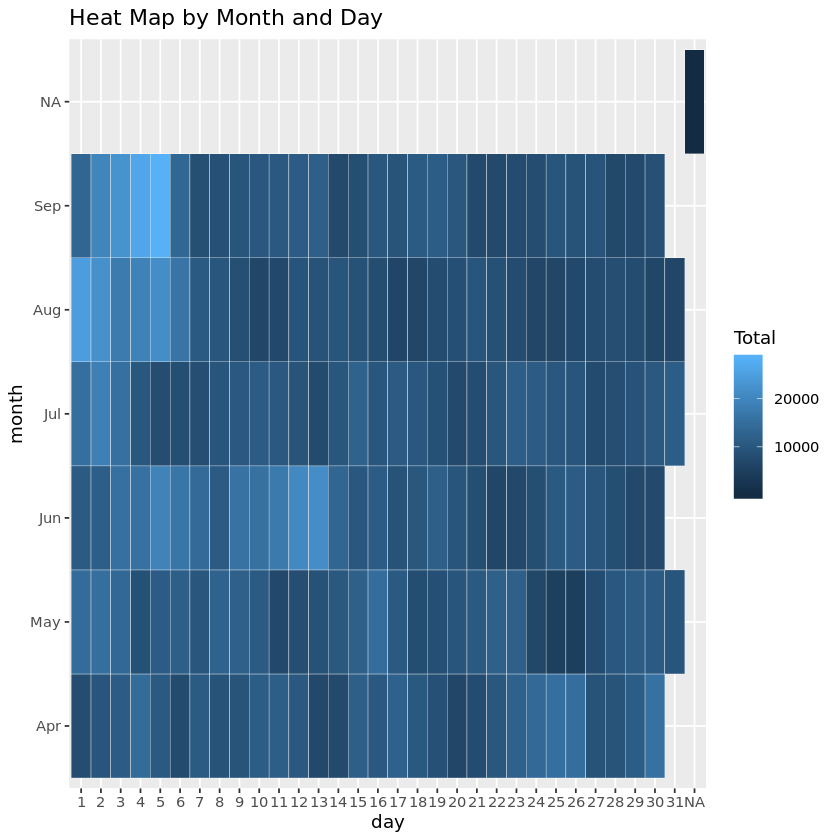

In [30]:
ggplot(day_month_group, aes(day, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day")

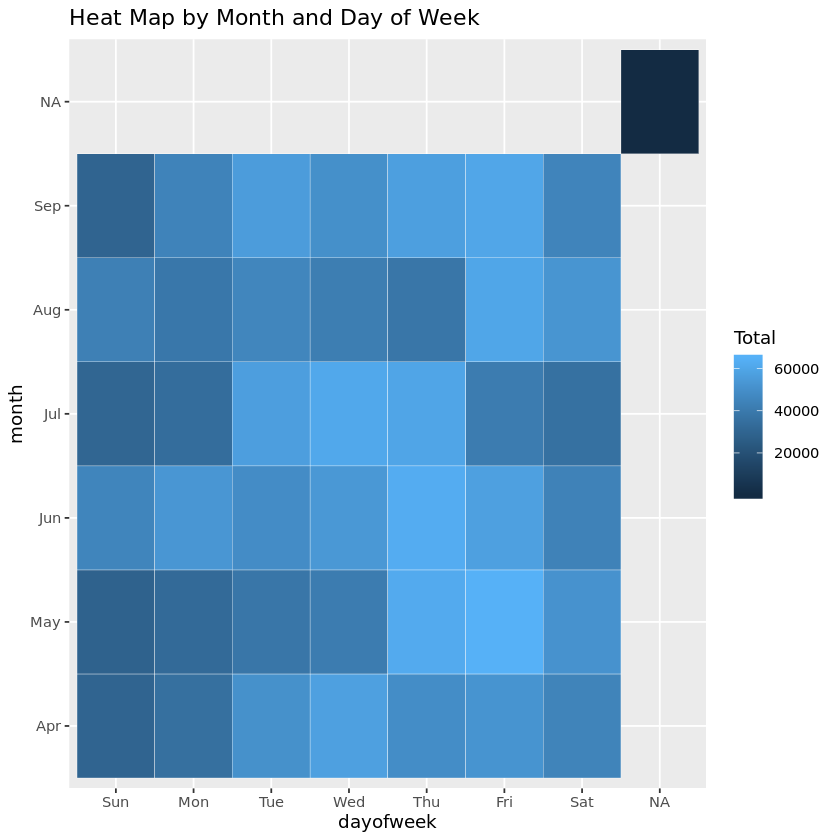

In [31]:
ggplot(month_weekday, aes(dayofweek, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day of Week")

Warning message:
“Factor `month` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `dayofweek` contains implicit NA, consider using `forcats::fct_explicit_na`”

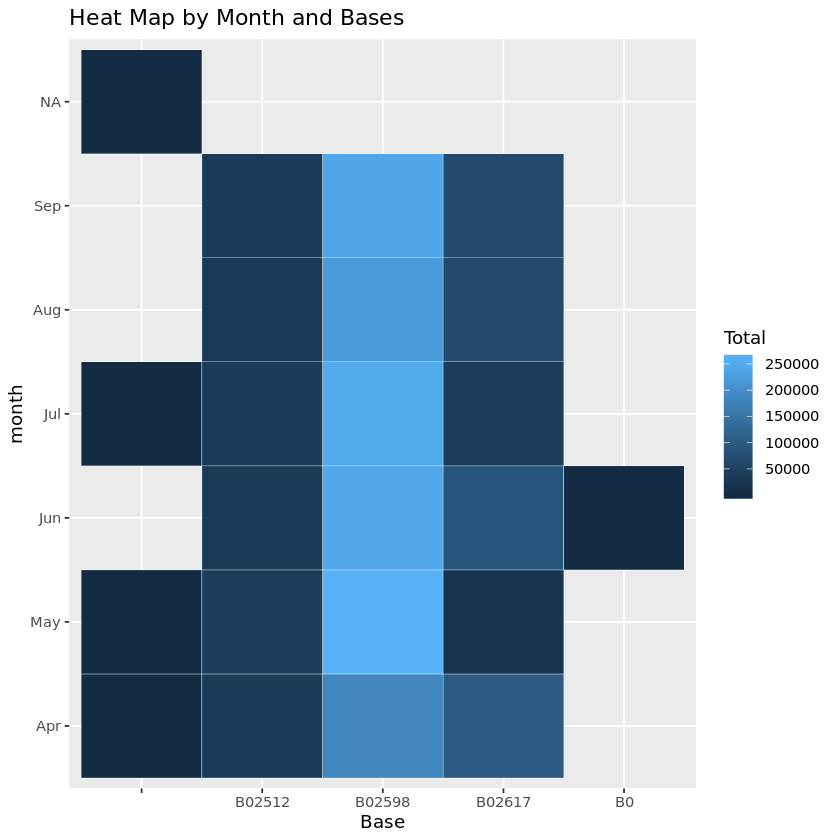

In [32]:
month_base <-  data_2014 %>%
                    group_by(Base, month) %>%
                        dplyr::summarize(Total = n()) 
day0fweek_bases <-  data_2014 %>%
                    group_by(Base, dayofweek) %>%
                        dplyr::summarize(Total = n()) 
ggplot(month_base, aes(Base, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Bases")

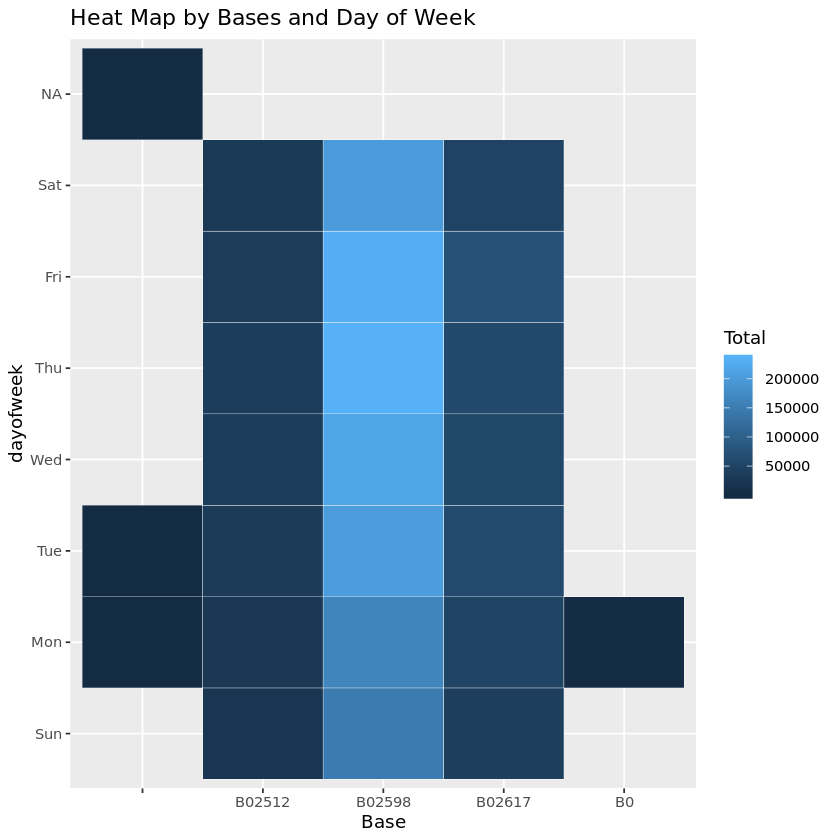

In [33]:
ggplot(day0fweek_bases, aes(Base, dayofweek, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Bases and Day of Week")

In [34]:
min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004
ggplot(data_2014, aes(x=Lon, y=Lat)) +
  geom_point(size=1, color = "blue") +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
        theme_map() +
           ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)")
ggplot(data_2014, aes(x=Lon, y=Lat, color = Base)) +
  geom_point(size=1) +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
       theme_map() +
          ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE")

ERROR: Error in theme_map(): could not find function "theme_map"
